In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('postlikes.csv')

In [4]:
import math
N = 10000
d = 10
posts_liked = []
numbers_of_likes = [0] * d
sums_of_rewards = [0] * d
total_reward = 0
for n in range(0, N):
  post = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (numbers_of_likes[i] > 0):
      average_reward = sums_of_rewards[i] / numbers_of_likes[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / numbers_of_likes[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      post = i
  posts_liked.append(post)
  numbers_of_likes[post] = numbers_of_likes[post] + 1
  reward = dataset.values[n, post]
  sums_of_rewards[post] = sums_of_rewards[post] + reward
  total_reward = total_reward + reward

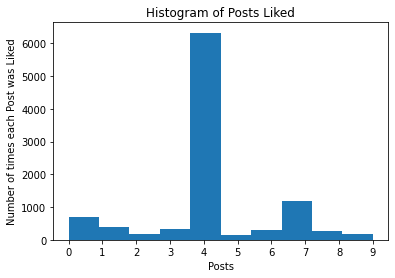

In [5]:
plt.hist(posts_liked)
plt.xticks(np.arange(0, 10, 1))
plt.title('Histogram of Posts Liked')
plt.xlabel('Posts')
plt.ylabel('Number of times each Post was Liked')
plt.show()

In [6]:
dataset2 = pd.read_csv('postcomments.tsv', delimiter = '\t', quoting = 3)

In [7]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
  review = re.sub('[^a-zA-Z]', ' ', dataset2['Review'][i])
  review = review.lower()
  review = review.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset2.iloc[:, -1].values

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [10]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [11]:
y_pred = classifier.predict(X_test)

Confusion Matrix :


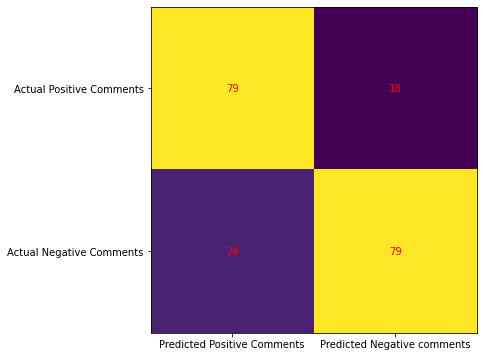

Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.81      0.79        97
           1       0.81      0.77      0.79       103

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.79       200
weighted avg       0.79      0.79      0.79       200

Accuracy Rate:  79.0 %


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix :')
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Positive Comments', 'Predicted Negative comments'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Positive Comments', 'Actual Negative Comments'))
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()
from sklearn.metrics import classification_report
print('Classification Report: ')
print(classification_report(y_test, y_pred))
print('Accuracy Rate: ',accuracy_score(y_test, y_pred)*100,'%')

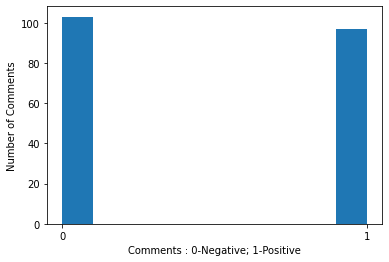

In [13]:
from array import array
res = array("i", y_pred)
plt.hist(res)
plt.xticks(np.arange(0, 1.5, 1))
plt.xlabel('Comments : 0-Negative; 1-Positive')
plt.ylabel('Number of Comments')
plt.show()


In [17]:
from sklearn import metrics
print("Precision:",metrics.precision_score(y_test, y_pred)*100)
print("Recall:",metrics.recall_score(y_test, y_pred)*100)

Precision: 81.44329896907216
Recall: 76.69902912621359
